<a href="https://colab.research.google.com/github/PSivaMallikarjun/Image-Classification-ImageNet-Library-using-Transfer-Learning/blob/main/Image_Classification_(ImageNet_Library)_using_Transfer_Learning_Keras_InceptionResNetV2_(Deep_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Classification (ImageNet Library) using Transfer Learning - Keras InceptionResNetV2 (Deep Learning) Transfer learning uses "knowledge gained in solving a problem" and applies it to a different but related problem.

In Transfer Learning, we use a model that has been previously trained on a dataset and includes weights and biases that represent the properties of the dataset it was trained on.

In this project, we will use the InceptionResNetV2 model, which has a pre-trained 164-layer advanced architecture and is pre-trained with an ImageNet dataset containing more than 1 million images.

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 253s 9s/step - accuracy: 0.0819 - loss: 2.3913 - val_accuracy: 0.0950 - val_loss: 2.3235
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 235s 10s/step - accuracy: 0.0975 - loss: 2.3252 - val_accuracy: 0.1200 - val_loss: 2.2990
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 219s 8s/step - accuracy: 0.0728 - loss: 2.3184 - val_accuracy: 0.0950 - val_loss: 2.3003
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 186s 8s/step - accuracy: 0.1074 - loss: 2.3303 - val_accuracy: 0.0850 - val_loss: 2.3077
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 188s 8s/step - accuracy: 0.1080 - loss: 2.3083 - val_accuracy: 0.0950 - val_loss: 2.3233
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 188s 8s/step - accuracy: 0.0941 - loss: 2.3421 - val_accuracy: 0.1000 - val_loss: 2.3302
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 192s 8s/step - accuracy: 0.0905 - loss: 2.3346 - val_accuracy: 0.0650 - val_loss: 2.3189
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 207s 8s/step - accuracy: 0.1070 - loss: 2.3208 - val_accuracy: 0.0900 - 

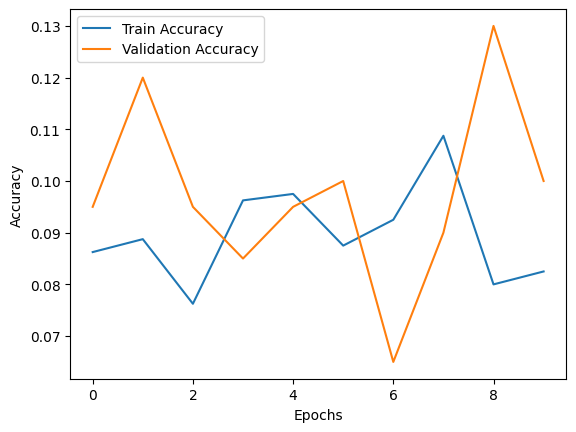

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define dataset path
dataset_path = '/content/generated_dataset'

# Generate synthetic dataset if not exists
def generate_synthetic_dataset(path, num_classes=10, num_images=100):
    os.makedirs(path, exist_ok=True)
    for class_id in range(num_classes):
        class_dir = os.path.join(path, f'class_{class_id}')
        os.makedirs(class_dir, exist_ok=True)
        for img_id in range(num_images):
            img = Image.fromarray(np.random.randint(0, 255, (224, 224, 3), dtype=np.uint8))
            img.save(os.path.join(class_dir, f'img_{img_id}.png'))

# Create dataset
generate_synthetic_dataset(dataset_path)

# Load pre-trained InceptionResNetV2 model without top layers
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # Assuming 10 classes

# Create new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and loading
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(dataset_path, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training')
validation_generator = train_datagen.flow_from_directory(dataset_path, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation')

# Train the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=10, verbose=1)

# Plot training results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
model.save('inception_resnet_v2_transfer_learning.h5')
